In [1]:
# 必要なモジュールのインポート
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import ShuffleSplit
from sklearn import linear_model

In [20]:
data = load_iris() # データをロード
X = data.data      # 特徴量
y = data.target    # ラベル
X.shape, y.shape

((150, 4), (150,))

In [3]:
ss = ShuffleSplit(n_splits=1,      # 分割を1個生成
                  train_size=0.5,  # 学習は半分
                  test_size =0.5,  # テストも半分
                  random_state=0)  # 乱数種（再現用）

In [4]:
clf = linear_model.LogisticRegression() # 識別器を作成

In [5]:
# 学習データとテストデータのインデックスを作成
train_index, test_index = next(ss.split(X))

X_train, X_test = X[train_index], X[test_index] # 学習データ，テストデータ
y_train, y_test = y[train_index], y[test_index] # 学習データのラベル，テストデータのラベル

In [6]:
clf.fit(X_train, y_train); # 識別器の学習

In [7]:
print(clf.score(X_train, y_train)) # 学習データの精度

0.92


In [8]:
print(clf.score(X_test, y_test)) # テストデータの精度

0.84


In [15]:
ss = ShuffleSplit(n_splits=10,     # 分割を10個生成
                  train_size=0.5,  # 学習は半分
                  test_size =0.5,  # テストも半分
                  random_state=0)  # 乱数種（再現用）
i = 0
for train_index, test_index in ss.split(X): 
    print(i, '番目のデータセット')
    print(train_index)
    print(test_index)
    print()
    i += 1

0 番目
[  3 149  98   6  68 109  96  12 102 120 104 128  46  11 110 124  41 148
   1 113 139  42   4 129  17  38   5  53 143 105   0  34  28  55  75  35
  23  74  31 118  57 131  65  32 138  14 122  19  29 130  49 136  99  82
  79 115 145  72  77  25  81 140 142  39  58  88  70  87  36  21   9 103
  67 117  47]
[114  62  33 107   7 100  40  86  76  71 134  51  73  54  63  37  78  90
  45  16 121  66  24   8 126  22  44  97  93  26 137  84  27 127 132  59
  18  83  61  92 112   2 141  43  10  60 116 144 119 108  69 135  56  80
 123 133 106 146  50 147  85  30 101  94  64  89  91 125  48  13 111  95
  20  15  52]

1 番目
[101  29  81  20  46  51  53  23  27   2  28  37 111  10  84 137 127  43
  87  69 144 140  35  76   3  82 145 116  88  44 147   1  93  38  11 115
  54  40  18  41  79  24  56  71  13  31  85  70 132 125 123 100  32 104
  83 117 118 138  25 110  16  75 109 121  86 139   4  96  14  61  67 149
  95  19  72]
[ 92 141 130 119  48 143 122  63  26  64  42 108  91  77  22 148   6  6

In [9]:
ss = ShuffleSplit(n_splits=10,     # 分割を10個生成
                  train_size=0.5,  # 学習は半分
                  test_size =0.5,  # テストも半分
                  random_state=0)  # 乱数種（再現用）

scores = []
for train_index, test_index in ss.split(X): # 学習データとテストデータのインデックスを作成
    
    X_train, X_test = X[train_index], X[test_index] # 学習データ，テストデータ
    y_train, y_test = y[train_index], y[test_index] # 学習データのラベル，テストデータのラベル

    clf.fit(X_train, y_train)         # 識別器の学習
    score = clf.score(X_test, y_test) # テストデータの精度
    scores.append(score)

scores = np.array(scores)
print(scores)

[ 0.84        0.93333333  0.90666667  1.          0.90666667  0.93333333
  0.94666667  1.          0.90666667  0.88      ]


In [21]:
scores.mean()

0.92533333333333334

In [22]:
scores.std()

0.047027178902795737

In [23]:
print("{0} +/- {1}".format(scores.mean(), scores.std()))

0.9253333333333333 +/- 0.04702717890279574


In [33]:
# print("{0:4.2f} +/- {1:4.2f} %".format(scores.mean() * 100, scores.std() * 100))
print("{0: .2%} +/- {1: .2%} ".format(scores.mean() , scores.std()))

 92.53% +/-  4.70% 


In [34]:
# matplotlibの準備
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
# 学習データの分量を0.1, 0.2, ..., 0.9に
train_sizes = np.arange(0.1, 1.0, 0.1)

In [42]:
all_mean = []
all_std  = []

for train_size in train_sizes:

    ss = ShuffleSplit(n_splits=100,
                      train_size=train_size,
                      test_size=1-train_size)

    scores = []
    for train_index, test_index in ss.split(X):

        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        scores.append(score)

    scores = np.array(scores)
    print("train_size {0:.0f}%: {1:4.2f} +/- {2:4.2f} %".format(train_size    * 100, 
                                                                scores.mean() * 100, 
                                                                scores.std()  * 100))
    all_mean.append(scores.mean() * 100)
    all_std.append(scores.std() * 100)

train_size 10%: 74.77 +/- 10.97 %
train_size 20%: 83.70 +/- 10.56 %
train_size 30%: 89.55 +/- 5.82 %
train_size 40%: 92.22 +/- 5.14 %
train_size 50%: 93.20 +/- 4.24 %
train_size 60%: 94.22 +/- 3.47 %
train_size 70%: 94.91 +/- 3.24 %
train_size 80%: 94.37 +/- 4.41 %
train_size 90%: 94.47 +/- 5.58 %


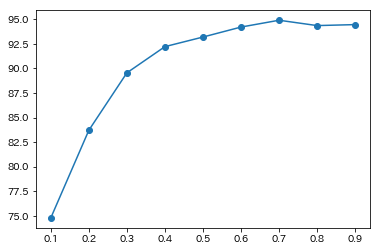

In [43]:
plt.plot(train_sizes, all_mean, marker='o')

(0, 1)

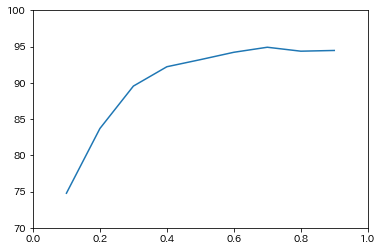

In [44]:
plt.plot(train_sizes, all_mean)
plt.ylim(70,100)
plt.xlim(0,1)

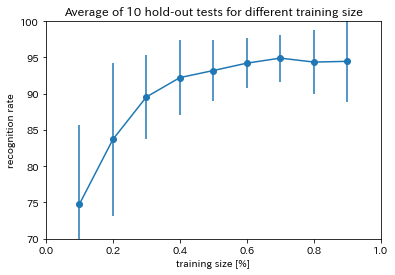

In [48]:
#plt.plot(train_sizes, all_mean, marker='o')
plt.ylim(70,100)
plt.xlim(0,1)
plt.errorbar(train_sizes, all_mean, yerr=all_std, marker='o')
plt.xlabel("training size [%]")
plt.ylabel("recognition rate")
plt.title("Average of 10 hold-out tests for different training size")